In [5]:
# Q1
# Read the CSV file into a DataFrame.
# after downloading it on your computer, run this
import pandas as pd
df = pd.read_csv('6_Purcahse_Records_Dataset.csv')
display(df.head())

,Transaction_ID,Customer_ID,Region,Age,Product_Category,Quantity,Payment_Method,Price,Discount,Purchase_Date,Store_Type,First_Purchase_Date,Lead_Time_Days
0,5766,4494,East,28.0,Home Goods,3,Debit Card,58.09,0.16,2023-08-27,In-Store,2006-09-04,NaN
1,12513,2526,East,62.0,Home Goods,5,Credit Card,212.36,0.03,2023-03-14,Online,2017-02-28,4.0
2,8359,3560,South,37.0,Clothing,9,Credit Card,145.99,0.02,2024-08-19,In-Store,2008-11-20,NaN
3,3160,1115,North,37.0,Home Goods,1,Credit Card,53.45,0.13,2023-01-28,Online,2020-04-14,5.0
4,8514,1428,West,59.0,Toys,3,Credit Card,268.64,0.13,2023-08-06,Online,2013-06-22,7.0


In [7]:
import pandas as pd
df = pd.read_csv('6_Purcahse_Records_Dataset.csv')

In [9]:
# Q2
# What are the data types and the count of non-null values in each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15598 entries, 0 to 15597
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction_ID       15598 non-null  int64  
 1   Customer_ID          15598 non-null  int64  
 2   Region               15598 non-null  object 
 3   Age                  15089 non-null  float64
 4   Product_Category     15598 non-null  object 
 5   Quantity             15598 non-null  int64  
 6   Payment_Method       15598 non-null  object 
 7   Price                15111 non-null  float64
 8   Discount             15249 non-null  float64
 9   Purchase_Date        15598 non-null  object 
 10  Store_Type           15115 non-null  object 
 11  First_Purchase_Date  15598 non-null  object 
 12  Lead_Time_Days       6006 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.5+ MB


In [12]:
# Q3
# What are the summary statistics for the numerical columns in the dataset?
display(df.describe())

,Transaction_ID,Customer_ID,Age,Quantity,Price,Discount,Lead_Time_Days
count,15598.000000,15598.000000,15089.000000,15598.000000,15111.000000,15249.000000,6006.000000
mean,7799.500000,2996.101680,43.522434,5.134248,258.312789,0.150249,4.975358
std,4502.899085,1152.155876,14.927695,2.658924,141.995014,0.086977,2.579699
min,1.000000,1000.000000,18.000000,1.000000,8.940000,0.000000,1.000000
25%,3900.250000,1993.000000,31.000000,3.000000,136.635000,0.080000,3.000000
50%,7799.500000,2987.000000,43.000000,5.000000,258.050000,0.150000,5.000000
75%,11698.750000,3997.000000,56.000000,7.000000,380.140000,0.230000,7.000000
max,15598.000000,4999.000000,69.000000,10.000000,598.630000,0.300000,9.000000


In [15]:
# Q4
# Which columns have missing values, and how many missing values does each column have?
display(df.isnull().sum())

Transaction_ID            0
Customer_ID               0
Region                    0
Age                     509
Product_Category          0
Quantity                  0
Payment_Method            0
Price                   487
Discount                349
Purchase_Date             0
Store_Type              483
First_Purchase_Date       0
Lead_Time_Days         9592
dtype: int64

In [19]:
# Q5
# What is the total number of missing values in the dataset?
total_missing = df.isnull().sum().sum()
print(f'Total missing values: {total_missing}')

Total missing values: 11420


In [24]:
# Q6
# Select and display only the numerical columns in the dataset.
numerical_columns = df.select_dtypes(include=['number'])
display(numerical_columns.head())

,Transaction_ID,Customer_ID,Age,Quantity,Price,Discount,Lead_Time_Days
0,5766,4494,28.0,3,58.09,0.16,NaN
1,12513,2526,62.0,5,212.36,0.03,4.0
2,8359,3560,37.0,9,145.99,0.02,NaN
3,3160,1115,37.0,1,53.45,0.13,5.0
4,8514,1428,59.0,3,268.64,0.13,7.0


In [44]:
# Q7
# Convert the Age column to an integer data type and verify the conversion.
# need to fill missing values with 0 to avoid error due to missing values
df['Age'] = df['Age'].fillna(0).astype(int)
display(df['Age'].head())

0    28
1    62
2    37
3    37
4    59
Name: Age, dtype: int32

In [46]:
# Q8
# What are the unique regions and product categories in the dataset?
unique_regions = df['Region'].unique()
unique_categories = df['Product_Category'].unique()
print(f'Unique Regions: {unique_regions}')
print(f'Unique Product Categories: {unique_categories}')

Unique Regions: ['East' 'South' 'North' 'West']
Unique Product Categories: ['Home Goods' 'Clothing' 'Toys' 'Electronics' 'Sports']


In [50]:
# Q9
# How many unique customers are present in the dataset?
unique_customers = df['Customer_ID'].nunique()
print(f'Unique Customers: {unique_customers}')

Unique Customers: 3775


In [54]:
# Q10
# What are the most frequent product categories?
category_counts = df['Product_Category'].value_counts()
display(category_counts)

Product_Category
Clothing       3169
Home Goods     3146
Toys           3112
Sports         3104
Electronics    3067
Name: count, dtype: int64

In [58]:
# Q11: 
# Filtering customers in the 'North' region who used 'Credit Card'
north_credit_customers = df[
    (df['Region'].eq('North')) & 
    (df['Payment_Method'].eq('Credit Card'))
]
north_credit_customers
        

,Transaction_ID,Customer_ID,Region,Age,Product_Category,Quantity,Payment_Method,Price,Discount,Purchase_Date,Store_Type,First_Purchase_Date,Lead_Time_Days
3,3160,1115,North,37,Home Goods,1,Credit Card,53.45,0.13,2023-01-28,Online,2020-04-14,5.0
7,3311,4150,North,32,Sports,5,Credit Card,354.96,0.18,2024-08-04,Online,2010-12-04,8.0
35,5067,2494,North,64,Sports,1,Credit Card,132.85,0.29,2023-02-01,Online,2005-11-21,2.0
52,12812,2267,North,65,Clothing,4,Credit Card,355.24,0.15,2024-05-20,In-Store,2005-09-21,NaN
57,15534,3874,North,47,Electronics,7,Credit Card,106.87,0.02,2024-08-11,Online,2012-07-22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15569,4526,4691,North,61,Electronics,4,Credit Card,263.94,0.11,2023-12-08,NaN,2015-05-18,NaN
15574,8142,1507,North,50,Home Goods,5,Credit Card,25.36,0.11,2023-11-20,In-Store,2017-09-04,NaN
15587,6396,4904,North,50,Home Goods,5,Credit Card,15.42,0.06,2023-08-16,In-Store,2009-11-26,NaN
15588,15161,1235,North,55,Toys,7,Credit Card,81.26,0.11,2024-10-14,In-Store,2012-02-10,NaN


In [69]:
# Q12
# Filtering online orders for 'Electronics' with discount > 10%
online_electronics_discount = df[
    (df['Store_Type'].eq('Online')) & 
    (df['Product_Category'].eq('Electronics')) & 
    (df['Discount'].gt(0.10))
]
online_electronics_discount
        

,Transaction_ID,Customer_ID,Region,Age,Product_Category,Quantity,Payment_Method,Price,Discount,Purchase_Date,Store_Type,First_Purchase_Date,Lead_Time_Days
8,5055,3459,East,36,Electronics,7,Debit Card,382.15,0.15,2023-04-07,Online,2013-08-02,5.0
47,11738,3293,West,0,Electronics,5,Debit Card,80.05,0.16,2023-11-25,Online,2010-01-06,4.0
111,4978,4426,West,27,Electronics,1,Debit Card,368.54,0.13,2023-09-18,Online,2018-05-03,4.0
112,11444,1772,South,27,Electronics,6,Debit Card,245.68,0.18,2024-05-22,Online,2014-12-05,4.0
133,11962,4613,East,32,Electronics,7,Credit Card,253.32,0.29,2024-02-19,Online,2012-10-26,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15526,3789,1663,West,36,Electronics,4,Debit Card,218.21,0.29,2023-10-08,Online,2021-09-10,3.0
15535,11001,2272,West,53,Electronics,6,Debit Card,84.81,0.11,2023-09-02,Online,2022-09-25,1.0
15536,6801,4020,East,43,Electronics,5,Credit Card,438.33,0.15,2024-06-17,Online,2014-10-14,7.0
15537,2574,4061,East,29,Electronics,2,Debit Card,434.38,0.19,2024-04-30,Online,2012-09-23,9.0


In [73]:
# Q13
# Calculating the average price of products by region
average_price_by_region = df.groupby('Region')['Price'].mean()
average_price_by_region
        

Region
East     263.289556
North    257.661987
South    257.075449
West     255.126003
Name: Price, dtype: float64

In [87]:
# Q14
# Aggregating total quantity sold by product category and region
total_quantity_by_category_region = df.groupby(['Region', 'Product_Category'])['Quantity'].sum()
total_quantity_by_category_region
        

Region  Product_Category
East    Clothing            4355
        Electronics         4103
        Home Goods          4082
        Sports              3917
        Toys                4161
North   Clothing            3934
        Electronics         3816
        Home Goods          3805
        Sports              3999
        Toys                3574
South   Clothing            4017
        Electronics         3896
        Home Goods          4211
        Sports              4251
        Toys                3763
West    Clothing            4103
        Electronics         3825
        Home Goods          4095
        Sports              3816
        Toys                4361
Name: Quantity, dtype: int64

In [92]:
# Q15
# Creating a pivot table for average price by payment method and region
pivot_table_price_payment_region = df.pivot_table(
    values='Price', index='Region', columns='Payment_Method', aggfunc='mean', fill_value=0
)
pivot_table_price_payment_region
        

Payment_Method,Cash,Credit Card,Debit Card
Region,,,
East,278.499717,262.819083,255.134769
North,264.243434,253.122406,259.087362
South,245.328602,257.956854,262.399608
West,254.968076,255.236521,255.102386


<Axes: >

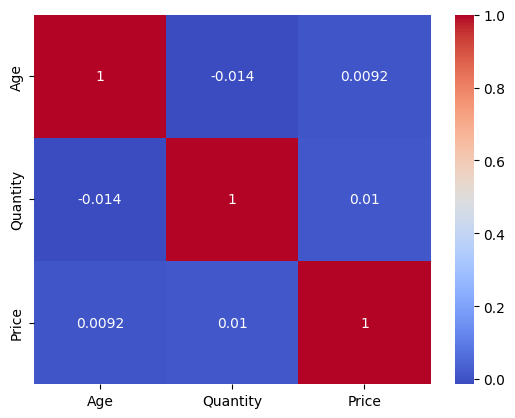

In [97]:
# Q16
import seaborn as sns

# Calculating correlation
correlation_matrix = df[['Age', 'Quantity', 'Price']].corr()

# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        

In [106]:
# Q 17
# Defining a function to categorize age
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age <= 59:
        return 'Middle-aged'
    else:
        return 'Old'

# Applying the function
df['Age_Category'] = df['Age'].apply(categorize_age)
df[['Age', 'Age_Category']]
        

,Age,Age_Category
0,28,Young
1,62,Old
2,37,Young
3,37,Young
4,59,Middle-aged
...,...,...
15593,53,Middle-aged
15594,42,Middle-aged
15595,53,Middle-aged
15596,48,Middle-aged


In [116]:
# Q18
# Calculating the total value after applying the discount
df['Total_Value'] = df['Price'] * df['Quantity'] * (1 - df['Discount'])
df[['Price', 'Quantity', 'Discount', 'Total_Value']].head()
        

,Price,Quantity,Discount,Total_Value
0,58.09,3,0.16,146.3868
1,212.36,5,0.03,1029.9460
2,145.99,9,0.02,1287.6318
3,53.45,1,0.13,46.5015
4,268.64,3,0.13,701.1504


In [127]:
# Q19
# Identifying returning customers
customer_transaction_counts = df['Customer_ID'].value_counts()
returning_customers = customer_transaction_counts[customer_transaction_counts.gt(1)]

# Calculating the percentage of returning customers
percentage_returning = (len(returning_customers) / len(customer_transaction_counts)) * 100
returning_customers, percentage_returning
        

(Customer_ID
 2098    13
 1920    12
 3773    12
 2799    12
 3169    12
         ..
 1308     2
 3447     2
 2003     2
 3322     2
 2298     2
 Name: count, Length: 3426, dtype: int64,
 90.75496688741723)

In [132]:
# Q20
# Filtering online orders and calculating average lead time by product category
online_orders = df[df['Store_Type'] == 'Online']
average_lead_time_by_category = online_orders.groupby('Product_Category')['Lead_Time_Days'].mean()
average_lead_time_by_category
        

Product_Category
Clothing       4.910140
Electronics    4.989983
Home Goods     4.893061
Sports         5.119658
Toys           4.970000
Name: Lead_Time_Days, dtype: float64

In [148]:
# Q21
def calculate_discount_frequency(discounts):
    """
    Calculate the frequency of discounts in a given series.
    The frequency is defined as the proportion of non-zero discounts.
    
    It accepts discounts (Series): The 'Discount' column for a specific group.
    
    It returns Proportion of non-zero discounts.
    """
    return (discounts > 0).sum() / len(discounts)

# Calculate the frequency of discounts by region using the defined function
discount_frequency_by_region = df.groupby("Region")["Discount"].apply(calculate_discount_frequency)

# Calculate the average discount by region using groupby and mean
average_discount_by_region = df.groupby("Region")["Discount"].mean()

# Display the frequency of discounts by region
print("Frequency of Discounts by Region:")
print(discount_frequency_by_region)

# Display the average discount by region
print("\nAverage Discount by Region:")
print(average_discount_by_region)



Frequency of Discounts by Region:
Region
East     0.966948
North    0.952663
South    0.960174
West     0.962173
Name: Discount, dtype: float64

Average Discount by Region:
Region
East     0.151719
North    0.148388
South    0.150311
West     0.150420
Name: Discount, dtype: float64


In [150]:
# Q22
# Group by 'Store_Type' and filter only 'Online' purchases
online_purchases = df[df["Store_Type"].eq("Online")]

# Calculate the most common payment method for online purchases
most_common_payment_method = online_purchases["Payment_Method"].value_counts().idxmax()

# Calculate the count of payment methods for online purchases by region
payment_method_by_region = online_purchases.groupby("Region")["Payment_Method"].value_counts()

# Display the most common payment method
print("Most Common Payment Method for Online Purchases:")
print(most_common_payment_method)

# Display the payment method distribution by region
print("\nPayment Method Distribution for Online Purchases by Region:")
print(payment_method_by_region)


Most Common Payment Method for Online Purchases:
Debit Card

Payment Method Distribution for Online Purchases by Region:
Region  Payment_Method
East    Credit Card       756
        Debit Card        729
North   Debit Card        751
        Credit Card       713
South   Debit Card        785
        Credit Card       717
West    Credit Card       792
        Debit Card        763
Name: count, dtype: int64


Top 10 Customers by Total Monetary Value:
Customer_ID
1403    20504.3326
2598    20176.0535
4294    19672.6997
2939    19307.0017
2687    18596.7021
1067    17781.2897
3413    17726.9865
1545    17661.3132
3248    17278.7884
2925    17271.1785
Name: Total_Value, dtype: float64


<Axes: xlabel='Customer ID', ylabel='Total Money Spent'>

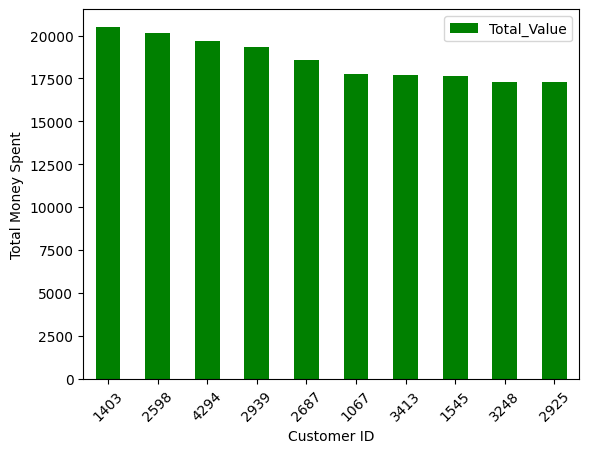

In [155]:
# Q 23
# Group by Customer_ID and calculate the total monetary value of transactions
total_value_by_customer = df.groupby("Customer_ID")["Total_Value"].sum()

# Sort customers by total value in descending order
top_customers = total_value_by_customer.sort_values(ascending=False).head(10)

# Display the top 10 customers
print("Top 10 Customers by Total Monetary Value:")
print(top_customers)
top_customers.plot(kind = 'bar', 
                   rot = 45, 
                   color = 'green',
                  legend = True,
                  xlabel = 'Customer ID',
                  ylabel = 'Total Money Spent')


Average Discount by Store Type:
Store_Type
In-Store    0.149733
Online      0.151672
Name: Discount, dtype: float64

The platform offering higher discounts on average is: Online


<Axes: title={'center': 'Average Discount by Store Type'}, xlabel='Store Type', ylabel='Average Discount'>

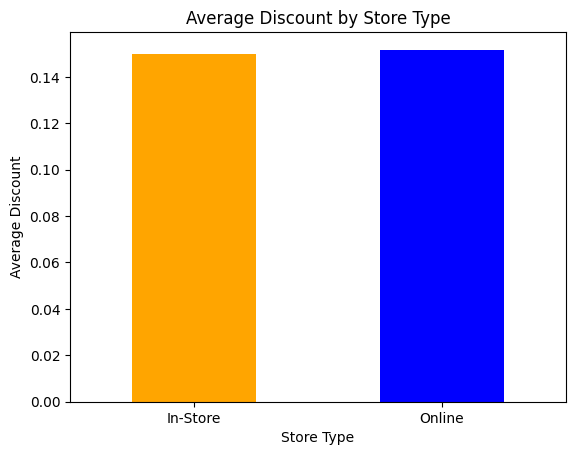

In [164]:
#Q 24
# Group by Store_Type and calculate the average discount for each type
average_discount_by_store_type = df.groupby("Store_Type")["Discount"].mean()

# Display the results
print("Average Discount by Store Type:")
print(average_discount_by_store_type)

# Analyze which platform offers higher discounts
higher_discount_store_type = average_discount_by_store_type.idxmax()
print(f"\nThe platform offering higher discounts on average is: {higher_discount_store_type}")

average_discount_by_store_type.plot(kind="bar", 
                                    color=["orange", "blue"], 
                                    legend=False,
                                   title = "Average Discount by Store Type", 
                                   xlabel = 'Store Type',
                                   ylabel = 'Average Discount',
                                   rot = 0)
